In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Sequential, Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
x_train = x_train/255.
x_test = x_test/255.

In [4]:
y_train[:, 0]

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [4]:
zeros = np.zeros((len(y_train), 10))
zeros[np.arange(len(y_train)), y_train[:, 0]] = 1
y_train = zeros

zeros = np.zeros((len(y_test), 10))
zeros[np.arange(len(y_test)), y_test[:, 0]] = 1
y_test = zeros

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [8]:
model_0 = Sequential(
    [
        tfl.Flatten(input_shape=(32,32,3)),
        tfl.Dense(256, activation="relu"),
        tfl.Dense(128, activation="relu"),
        # tfl.Dense(256, activation="relu"),
        tfl.Dense(10, activation="sigmoid"),
    ]
)

model_0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_0.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history_0 = model_0.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

2022-08-02 08:30:01.653888: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8558 - accuracy: 0.3317 - val_loss: 1.7423 - val_accuracy: 0.3676
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6846 - accuracy: 0.3972 - val_loss: 1.6072 - val_accuracy: 0.4265
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6064 - accuracy: 0.4218 - val_loss: 1.6337 - val_accuracy: 0.4198
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5624 - accuracy: 0.4423 - val_loss: 1.6235 - val_accuracy: 0.4177
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5301 - accuracy: 0.4486 - val_loss: 1.5277 - val_accuracy: 0.4498
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4996 - accuracy: 0.4636 - val_loss: 1.5422 - val_accuracy: 0.4441
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4797 - accuracy: 0.4708 - val_loss: 1.4810 - val_accuracy:

In [44]:
mcheckpoint = tf.keras.callbacks.ModelCheckpoint(
    "model",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
)

In [12]:
input = tfl.Input(shape=(32,32,3), name="input")
x = tfl.Conv2D(32, (3,3), activation="relu", name="l1c1")(input)
x = tfl.Conv2D(64, (3,3), activation="relu", name="l1c2")(x)
x = tfl.MaxPooling2D((2,2), name="l1p")(x)
x = tfl.Dropout(0.2, name="l1d")(x)
x = tfl.BatchNormalization(axis=-1, name="l1b")(x)

x = tfl.Conv2D(64, (3,3), activation="relu", name="l2c1")(x)
x = tfl.Conv2D(128, (3,3), activation="relu", name="l2c2")(x)
x = tfl.MaxPooling2D((2,2), name="l2p")(x)
x = tfl.Dropout(0.3, name="l2d")(x)
x = tfl.BatchNormalization(axis=-1, name="l2b")(x)

x = tfl.Conv2D(128, (2,2), padding="same", activation="relu", name="l3c1")(x)
x = tfl.Conv2D(256, (2,2), padding="same", activation="relu", name="l3c2")(x)
x = tfl.MaxPooling2D((2,2), name="l3p")(x)
x = tfl.Dropout(0.4, name="l3d")(x)
x = tfl.BatchNormalization(axis=-1, name="l3b")(x)

x = tfl.Flatten(name="flatten")(x)
x = tfl.Dense(256, activation="relu", name="dense")(x)
output = tfl.Dense(10, activation="sigmoid", name = "output")(x)
model = Model(input, output, name="model1")
model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
l1c1 (Conv2D)                (None, 30, 30, 32)        896       
_________________________________________________________________
l1c2 (Conv2D)                (None, 28, 28, 64)        18496     
_________________________________________________________________
l1p (MaxPooling2D)           (None, 14, 14, 64)        0         
_________________________________________________________________
l1d (Dropout)                (None, 14, 14, 64)        0         
_________________________________________________________________
l1b (BatchNormalization)     (None, 14, 14, 64)        256       
_________________________________________________________________
l2c1 (Conv2D)                (None, 12, 12, 64)        36928

In [14]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[mcheckpoint])

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5831 - accuracy: 0.4326 - val_loss: 1.2693 - val_accuracy: 0.5354

Epoch 00001: val_accuracy improved from -inf to 0.53540, saving model to model


2022-08-02 08:31:36.940072: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1237 - accuracy: 0.5985 - val_loss: 1.0357 - val_accuracy: 0.6392

Epoch 00002: val_accuracy improved from 0.53540 to 0.63920, saving model to model
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9670 - accuracy: 0.6580 - val_loss: 0.8979 - val_accuracy: 0.6829

Epoch 00003: val_accuracy improved from 0.63920 to 0.68290, saving model to model
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8726 - accuracy: 0.6924 - val_loss: 0.9427 - val_accuracy: 0.6705

Epoch 00004: val_accuracy did not improve from 0.68290
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8065 - accuracy: 0.7199 - val_loss: 0.7547 - val_accuracy: 0.7389

Epoch 00005: val_accuracy improved from 0.68290 to 0.73890, saving model to model
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7536 - accuracy: 0.7403 - val_loss: 

In [15]:
max_acc = max(history.history['accuracy'])
max_acc_val = max(history.history['val_accuracy'])
text = f"Training Complete! \nMaximum accuracy is: {max_acc} and maximum validation accuracy is: {max_acc_val}"
print(text)
# send_text(text)

Training Complete! 
Maximum accuracy is: 0.786620020866394 and maximum validation accuracy is: 0.7730000019073486


In [16]:
best_model = tf.keras.models.load_model('model')

In [17]:
best_model.evaluate(x_train, y_train)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.5194 - accuracy: 0.8179


[0.519384503364563, 0.8179399967193604]

In [18]:
best_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6662 - accuracy: 0.7730


[0.6662061810493469, 0.7730000019073486]

## Transfer Learning

In [19]:
x_train[0].shape

(32, 32, 3)

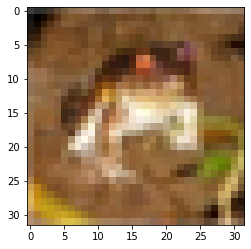

In [22]:
plt.imshow(x_train[0])

(224, 224, 3)


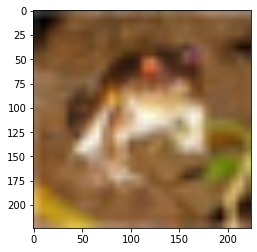

In [11]:
img_new = tf.image.resize(x_train[0], [224, 224])
print(img_new.shape)
plt.imshow(img_new)

In [50]:
class ResizeLayer(tf.keras.layers.Layer):
  def __init__(self):
    super(ResizeLayer, self).__init__()
    pass
  def build(self, input_shape):
    pass

  def call(self, inputs):
    return tf.image.resize(inputs, [224, 224])
layer = ResizeLayer()

In [20]:
# Create base model
image_shape = (32, 32, 3)
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

16719872/16705208 [==============================] - 0s 0us/step


In [21]:
x_train = (x_train*255).astype(int)
x_test = (x_test*255).astype(int)

In [54]:
inputs = tfl.Input(shape=image_shape, name="input_layer")
x = ResizeLayer()(inputs)
x = base_model(x, training=False) # set base_model to inference mode only
x = tfl.GlobalAveragePooling2D(name="pooling_layer")(x)
outputs = tfl.Dense(10, activation="sigmoid", name = "output")(x)
model = Model(inputs, outputs)

model.compile(loss="categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [55]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
resize_layer_15 (ResizeLayer (None, 224, 224, 3)       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
output (Dense)               (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [56]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 75s 44ms/step - loss: 0.4860 - accuracy: 0.8410 - val_loss: 0.3848 - val_accuracy: 0.8680
Epoch 2/20
1563/1563 [==============================] - 68s 43ms/step - loss: 0.3357 - accuracy: 0.8843 - val_loss: 0.3569 - val_accuracy: 0.8763
Epoch 3/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.3031 - accuracy: 0.8948 - val_loss: 0.3470 - val_accuracy: 0.8786
Epoch 4/20
1563/1563 [==============================] - 79s 50ms/step - loss: 0.2815 - accuracy: 0.9027 - val_loss: 0.3314 - val_accuracy: 0.8848
Epoch 5/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2668 - accuracy: 0.9081 - val_loss: 0.3275 - val_accuracy: 0.8846
Epoch 6/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2559 - accuracy: 0.9116 - val_loss: 0.3285 - val_accuracy: 0.8852
Epoch 7/20
1563/1563 [==============================] - 68s 43ms/step - loss: 0.2469 - accuracy: 0.9144 - val_loss: 0.3231 -

In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 11s 36ms/step - loss: 0.3361 - accuracy: 0.8879


[0.3361343741416931, 0.8878999948501587]

In [59]:
pred = model.predict(x_test)

In [63]:
pred = pred.argmax(axis=1)

In [65]:
y_test_n = y_test.argmax(axis=1)

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [70]:
classes = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]

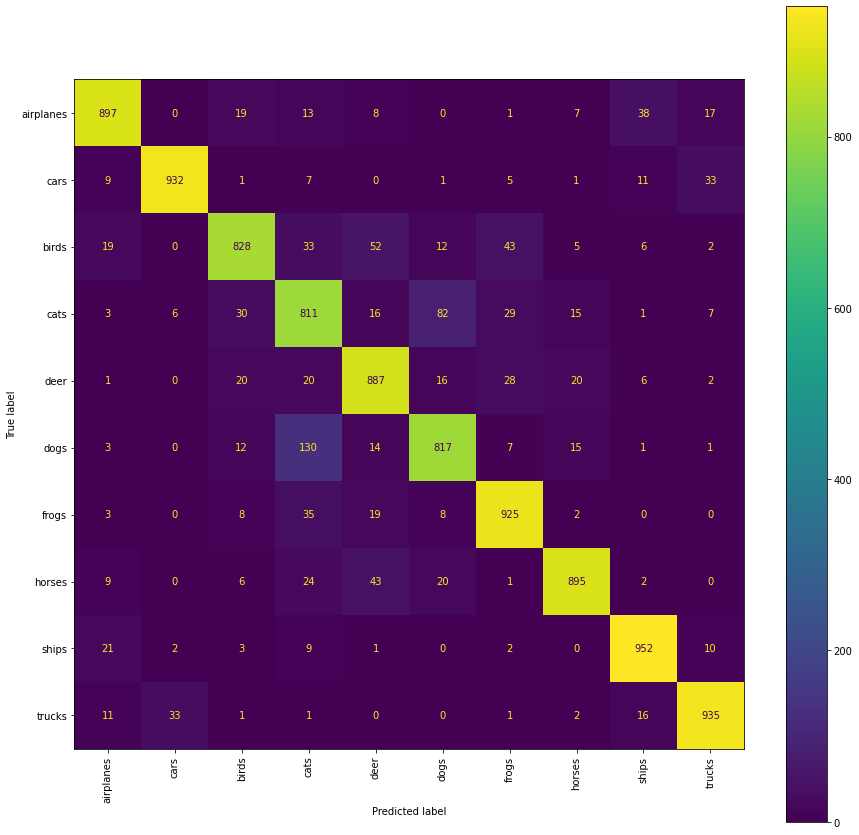

In [71]:
cm = confusion_matrix(y_test_n, pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots(figsize=((15, 15)))
cmp.plot(ax=ax, xticks_rotation='vertical')